In [1]:
3+4

7

In [2]:
from langgraph.graph import Graph

In [3]:
from langchain_groq import ChatGroq

In [4]:
llm = ChatGroq(model="llama3-70b-8192")

In [5]:
llm.invoke("hi how are you?")

AIMessage(content="Hi! I'm just a language model, so I don't have feelings like humans do, but I'm functioning properly and ready to help you with any questions or tasks you might have. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 15, 'total_tokens': 61, 'completion_time': 0.131428571, 'prompt_time': 0.000176718, 'queue_time': 0.052936881, 'total_time': 0.131605289}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run-a74b4935-d4a2-45c9-b3de-e0ded031d0ea-0', usage_metadata={'input_tokens': 15, 'output_tokens': 46, 'total_tokens': 61})

In [66]:
def function1(input):
    llm = ChatGroq(model="llama3-70b-8192")
    response=llm.invoke(input).content
    return response

In [67]:
function1("hi")

"Hi! It's nice to meet you. Is there something I can help you with, or would you like to chat?"

In [68]:
def function2(input):
    upper_string=input.upper()
    return upper_string

In [69]:
workflow = Graph()

In [70]:
workflow.add_node("llm",function1)
workflow.add_node("upper_string",function2)

In [71]:
workflow.add_edge("llm","upper_string")

In [72]:
workflow.set_entry_point("llm")

In [73]:
workflow.set_finish_point("upper_string")

In [74]:
app = workflow.compile()

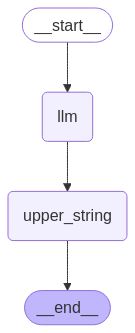

In [75]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [76]:
app.invoke("who is the first prime minister of india?")

'THE FIRST PRIME MINISTER OF INDIA WAS JAWAHARLAL NEHRU. HE WAS SWORN IN AS THE PRIME MINISTER OF INDIA ON AUGUST 15, 1947, WHEN INDIA GAINED INDEPENDENCE FROM BRITISH COLONIAL RULE. NEHRU SERVED AS PRIME MINISTER UNTIL HIS DEATH ON MAY 27, 1964.'